In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
plt.rcParams['figure.figsize'] = (20.0 , 10.0)

In [8]:
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [9]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [10]:
#mean of x and y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#total number of values
m = len(X)

#using the formula to calculate b1 and b2

numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
b1 = numer/denom
b0 = mean_y - (b1*mean_x)
print(b1, b0)

0.26342933948939945 325.57342104944223


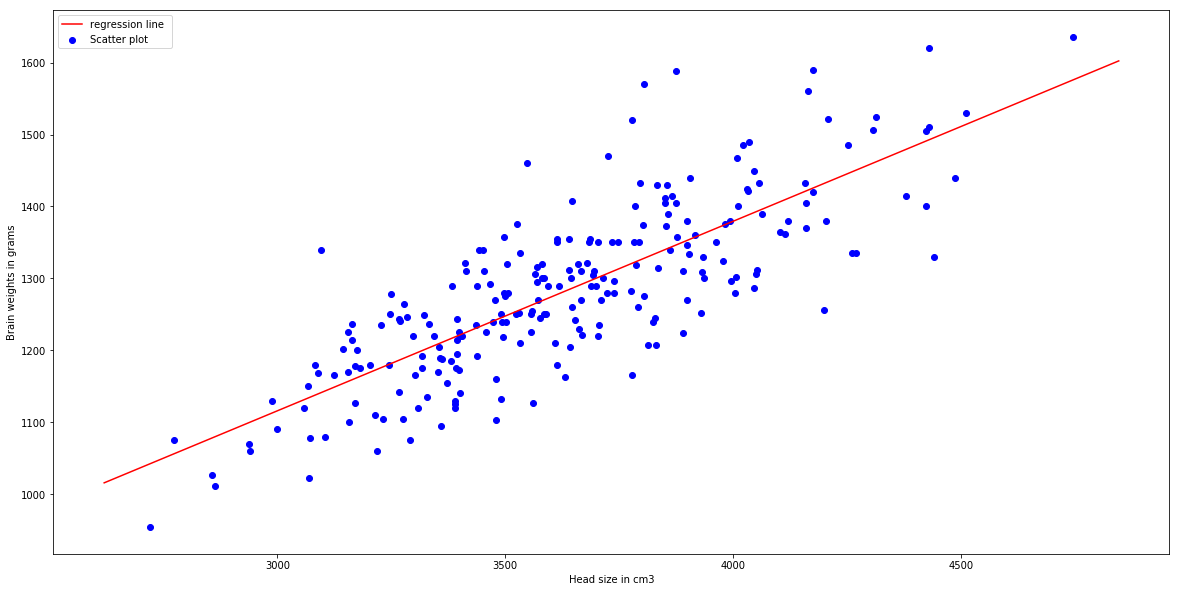

In [11]:
#ploting values and regression lines
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1*x

#plotting line
plt.plot(x , y ,color = 'red' , label = 'regression line ')
#ploting scatter points
plt.scatter(X , Y , color = 'blue' , label = 'Scatter plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain weights in grams')
plt.legend()
plt.show()

In [12]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * x[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

-3.166831684624621


by using scikit learn library

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
#cannot use rank 1 matrix in scikit learn library
X = X.reshape((m , 1))
#creating model
reg = LinearRegression()
#fitting trainig data 
reg = reg.fit(X , Y)
#Y prediction
y_pred = reg.predict(X)

#calculating RMSE and R2 score
mse = mean_squared_error(Y , y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X , Y)


print(r2_score)


0.639311719957
